# Projet de Data Mining et Machine Learning

## Rendu de:

* Yamine KEBAILI  
* Morgane QUELENNEC

# 1) Collecte de données
## a) Approches automatisées de la collecte de données

Téléchargement d'un dataset sur Kaggle contenant de nombreuses images et un fichier CSV contenant des informations pour ces images

In [14]:
# imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os # accessing directory structure
import csv
import math
import random
import json
import namegenerator

sklearn.show_versions()
from nltk.corpus import stopwords # list of stopwords
from nltk.tokenize import word_tokenize # tokenization function
from nltk.stem import WordNetLemmatizer # lemmatization function
from nltk.stem.porter import PorterStemmer # stemming function
import math


System:
    python: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]
executable: /bin/python3
   machine: Linux-5.4.72-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.2
   setuptools: 66.0.0
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.5.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/morgane/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: 

In [2]:
# Open dataset

# Get header csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )

/tmp/ipykernel_2088/3805032870.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3805032870.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Type1,Type2,Description
0,abomasnow,Grass,Ice,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,Psychic,NaN,is a Psychic-type Pokémon introduced in Genera...
2,absol,Dark,NaN,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,Bug,NaN,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,Steel,Ghost,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...,...,...
94,charizard,Fire,Flying,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Fire,NaN,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Fire,NaN,Charmeleon is a Fire-type Pokémon introduced i...
97,chatot,Normal,Flying,Chatot is a dual-type Normal/Flying Pokémon in...


Chaque ligne correspond à une image. par exemple la ligne contenant le nom de pokémon charizard possède l'image suivante:

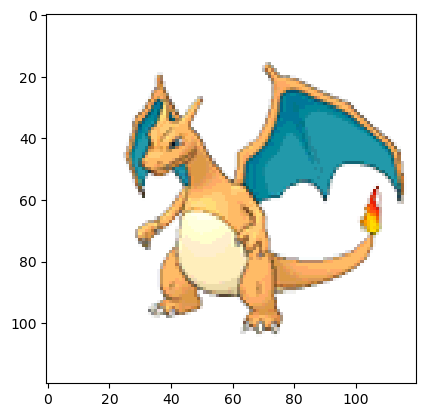

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_name = "charizard"
image_path = f"./dataset/images/{image_name}.png"

if not os.path.exists(image_path):
    print(f"Error: The file {image_path} does not exist.")
else:
    try:
        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img)
        plt.show()
    except Exception as e:
        print(f"Error: Unable to read the image {image_path}. {e}")

Les informations correspondant à cette image sont les suivantes: 

In [4]:
df.loc[df['id'].isin(["charizard"])]

,id,Type1,Type2,Description
94,charizard,Fire,Flying,Charizard is a dual-type Fire/Flying Pokémon i...


Pour répondre aux questions concernant le projet: 

### Approches automatisées de la collecte de données

Cette méthode a été choisie pour sa rapidité d'exécution et parce que le projet disposait déjà d'une grande quantité de données.   


### Utilisation d'images sous licence libre

Nous avons utilisé des images sous licence libre pour ce projet. Les images sont disponibles sur https://www.kaggle.com/dataset/vishalsubbiah/pokemon-images-and-types et peuvent être utilisées sans restriction.

### Stockage et gestion des images et des métadonnées associées

Les images utilisées pour le projet sont stockées dans le fichier zip que nous avons téléchargé. Il est nécessaire de dézipper le fichier (dataset.zip) pour y accéder. Les informations de métadonnées associées aux images sont stockées dans un fichier CSV séparé (dataset/pokemon.csv).

### Approches automatisées de l'étiquetage / Stockage et gestion des étiquettes et des annotations des images

Étant donné que le contenu de notre jeu de données téléchargé est déjà annoté, il n'est pas nécessaire de mettre en place des étiquettes supplémentaires. Nous pouvons donc nous concentrer sur les autres aspects du projet.


# Méthode par Text-Mining

## Objectif :

L'objectif de cette application est de proposer des images à l'utilisateur en fonction de sa sélection d'une ou plusieurs images. Pour cela, nous avons mis en place une première méthode basée sur le text-mining. Cette méthode consiste à utiliser la description de l'image sélectionnée pour effectuer une recherche de similarité sur toutes les descriptions des autres images disponibles.


### Sources :


* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* http://www.nltk.org/

## Plan du document :

1. **Principe de l'algorithme**
    1. **Traitement du corpus**
        1. **Transformation des descriptions**
        1. **Présentation des différentes étapes avec exemples**
    2. **Traitement d'une recherche**
        1. **Vectorisation de la requête**
        1. **Calcul de similarité**
1. **Exécution de l'application**

## 1. Principe de l'algorithme

Le principe de cet algorithme repose sur l'analyse de la fréquence des mots dans les textes et se déroule en deux étapes distinctes :

Une première étape préliminaire de traitement du corpus, qui a pour objectif de créer une matrice représentative de ce dernier.
La phase de recherche proprement dite consiste à représenter la requête de l'utilisateur (c'est-à-dire la description de l'image sélectionnée par l'utilisateur) de manière vectorielle et à trouver la ligne de la matrice du corpus (et donc des autres images) qui correspond le mieux à cette requête.

### A. Traitement du corpus

Le but est à partir du corpus constitué de description d'image sous la forme d'une chaîne de caractère de construire une matrice représentatrice de ce dernier. 

Chaque ligne de la matrice représente une description, et chaque colonne représente un mot présent dans ce corpus. La valeur dans la matrice à la position (i, j) correspond à l'importance du mot j pour le texte i par rapport aux autres descriptions.

Cette valeur permet de choisir parmi les descriptions. L'importance du mot doit être comprise comme l'importance dans le texte lui-même (répétition du mot dans le texte) et dans ce texte par rapport aux autres descriptions (mot présent dans la description mais peu dans le reste du corpus).

#### a. Transformation des descriptions

Pour construire la matrice, les descriptions sont d'abord "découpées" en listes de mots (tokenisation).

Ensuite, les mots trop courants (stopwords), considérés comme ayant peu de sens, sont éliminés (ce peut également être la ponctuation).

Ensuite, les mots sont transformés pour rassembler ceux qui ont un sens identique ou proche, en utilisant deux techniques :

Lemmatisation : regrouper les mots sous une même forme de mot-clé
Stemming : regrouper les mots sous un même radical
La bibliothèque python nltk (Natural Language ToolKit) est utilisée pour cela. La fonction "split" est ainsi définie :



#### b. Présentation des différentes étapes de scoring avec exemples

Pour cette méthode, nous allons travailler uniquement à l'aide des descriptions des images

In [5]:
# Delete unless columns
df = df.drop(['Type1', 'Type2'], axis=1)
df

,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


In [7]:
!sudo apt install python3-nltk

[sudo] password for morgane: 


In [8]:
!python3 -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/morgane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from nltk.corpus import stopwords # list of words not taken into account
from nltk.tokenize import word_tokenize # tokenization function
from nltk.stem import WordNetLemmatizer # lemmatization function
from nltk.stem.porter import PorterStemmer # stemming function

# "Hyperparameters"
stop_words = set(stopwords.words('english'))
# We can shape the list of words not taken into account
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()


def split(Description):
    """ Function that takes a text (an image description) as input and returns
    the list of its words that have been filtered and transformed: lemmatized and stemmed"""

    # Tokenization ************************************************************
    # Splitting the text into words (words is a list of strings)
    words = word_tokenize(str(Description))

    # Stop-words **************************************************************
    # Filtering words: we remove from words those that are contained in 
    # stop_words because they are supposed to have too little meaning.
    # (common words, linking words, punctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)

    # Lemmatization *************************************************************
    # Transforming words into a single keyword (lemma) representing them. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transforming words into a single root representing them. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]

    return words_stemmed


In [28]:
!sudo pip install -U nltk

[sudo] password for morgane: 

Exemple de la fonction split

In [19]:
# split the following line: 
keep_line = df.loc[df['id'].isin(["abra"])]
keep_line

,id,Description
1,abra,is a Psychic-type Pokémon introduced in Genera...


In [20]:
# We then obtain:
description_test = keep_line['Description'][1]
try:
    words = description_test.split()
except IndexError:
    print("Error: Index out of range")
else:
    print(words)


['is', 'a', 'Psychic-type', 'Pokémon', 'introduced', 'in', 'Generation', 'I.']


Nous pouvons alors identifier les "tokens" (mots distincts) du corpus, qui constituent ainsi une base pour représenter les descriptions sous forme vectorielle

Tachons à présent de transformer nos descriptions en matrice via les différents fonctions suivantes:

In [21]:
def count(words, wordbase):
    """Function that takes as input a text that has been split into words and the list 
    of tokens in the corpus, and returns the vector containing the number of occurrences 
    in the text of each token in the corpus."""
    
    vector = [0 for i in range(len(wordbase))]
    for i in range(len(wordbase)):
        if wordbase[i] in words:
            vector[i] += 1
    return vector


def preliminaryWork(corpus):
    """Function that takes as input a corpus of descriptions in the form of a 
    list of strings, and returns the list of words used as a basis for representing 
    the texts that make it up, and the matrix of these texts in this basis, 
    with the coordinates calculated using the TF-IDF formula."""
    
    # Splitting, sorting and transforming texts (see split function)
    corpus_words = []
    for i in range(len(corpus)):
        corpus_words.append(split(corpus[i]))
        
    # Constructing the list of words in the corpus (intersection of the words in the 
    # texts). Wordset is an object of type set, which is useful because it allows 
    # for set intersection, but it is not ordered. We therefore build wordbase 
    # from the words in wordset so that we can associate 1 word with 1 coordinate.
    wordset = set()
    for words in corpus_words:
        wordset = wordset.union(set(words))
    wordbase = [word for word in wordset]
    
    # Constructing the matrix representing the texts in the wordbase. We initialize 
    # it with the vectors whose coordinates are the raw counts.
    matrix = []
    for words in corpus_words:
        matrix.append(count(words, wordbase))
        
    # Calculating the number of texts that contain each word
    nt = [0 for m in range(len(wordbase))]
    for m in range(len(wordbase)):
        for line in matrix:
            if line[m] > 0:
                nt[m] += 1
    
    # Calculating the tf-idf of each word in each text
    # TF(word in a text) = log(1 + number of occurrences of this word in this text)
    # IDF(word) = log(total number of texts / number of texts containing this word)
    # TF-IDF(word in a text) = TF(word in a text) * IDF(word)
    for t in range(len(matrix)):
        for m in range(len(wordbase)):
            matrix[t][m] = math.log(1 + matrix[t][m]) * math.log(len(corpus) / nt[m])
            
    return (matrix, wordbase)


In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/morgane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Exemple: Prenons les 4 premières lignes de pokemon.csv

In [12]:
num_description_test = 4
for i in range(num_description_test):
    print(f"Description {i}: {df['Description'][i]}")

(matrix, wordbase) = preliminaryWork(df['Description'][:num_description_test])


Description 0: is a dual-type Grass/Ice Pokémon introduced in Generation IV.
Description 1: is a Psychic-type Pokémon introduced in Generation I.
Description 2: is a Dark-type Pokémon introduced in Generation III.
Description 3: is a Bug-type Pokémon introduced in Generation V.


Affichons la matrice 

In [22]:
df2 = pd.DataFrame(np.array(matrix),columns=wordbase,index=df['id'][:num_description_test])

num_description_test= 4
counter = 0

df2

,dual-typ,iv,v,grass/ic,psychic-typ,iii,bug-typ,gener,introduc,pokémon,dark-typ
id,,,,,,,,,,,
abomasnow,0.960906,0.960906,0.000000,0.960906,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
abra,0.000000,0.000000,0.000000,0.000000,0.960906,0.000000,0.000000,0.0,0.0,0.0,0.000000
absol,0.000000,0.000000,0.000000,0.000000,0.000000,0.960906,0.000000,0.0,0.0,0.0,0.960906
accelgor,0.000000,0.000000,0.960906,0.000000,0.000000,0.000000,0.960906,0.0,0.0,0.0,0.000000


Si l'on considère le mot "dark-typ" qui n'apparaît que dans la description 3, il obtient un score de 0,960906 (proche de 1), ce qui démontre son importance non seulement dans sa propre description, mais aussi par rapport aux autres descriptions.

## B. Traitement d'une recherche

Après avoir construit la matrice représentative du corpus, on souhaitera traiter les demandes de l'utilisateur. Pour ce faire, nous allons procéder en deux étapes :

* tout d'abord, nous allons vectoriser la demande de l'utilisateur, de la même manière que nous avons vectorisé les descriptions du corpus 
* ensuite, nous allons identifier la description la plus similaire à la demande en calculant la similarité entre la demande et chaque description.

### a. Vectorisation de la requête

Nous souhaitons transformer la requête en un vecteur. Pour que les vecteurs de la requête et des descriptions soient comparables et que les calculs aient une signification, il est nécessaire d'appliquer le même traitement à la requête qu'à celui appliqué aux descriptions. Ainsi, nous sommes assurés que les coordonnées du vecteur de la requête portent sur les bons tokens.

Pour assigner les coordonnées du vecteur, on attribue simplement à chaque token sa fréquence dans la requête.

Afin de réaliser cette opération, les fonctions "split" et "count" utilisées pour le traitement du corpus sont réutilisées pour créer la fonction "vectorisation" suivante :

### Dans notre cas, l'utiliseur possède les données suivantes:

In [23]:
# Loading our users
import json

with open('user_demo.json') as json_file:
    data = json.load(json_file)

print(f"data: {data}")

data: {'users': [{'name': 'yamine', 'name_photo_liked': ['bronzor', 'arbok', 'cacturne', 'boldore']}, {'name': 'morgane', 'name_photo_liked': ['clefable', 'combee', 'corsola', 'dragonair']}, {'name': 'emre', 'name_photo_liked': ['crustle', 'duskull']}, {'name': 'abou', 'name_photo_liked': ['corsola', 'beldum', 'archen']}]}


Par exemple l'utilisateur Yamine a liké les photos suivantes:

Pokemons liked by Yamine: ['bronzor', 'arbok', 'cacturne', 'boldore']


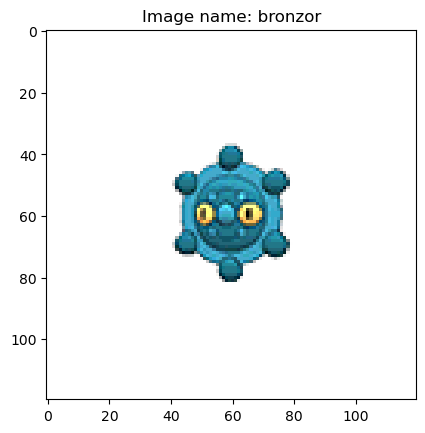

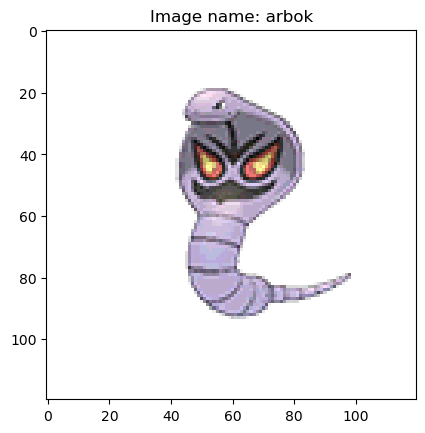

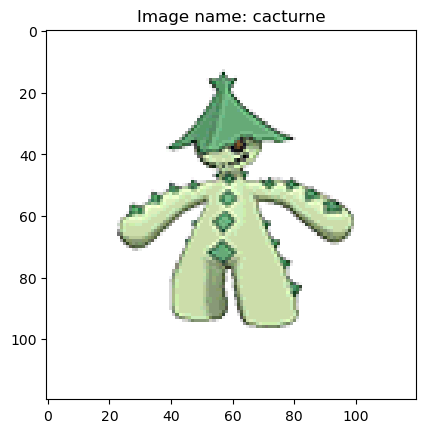

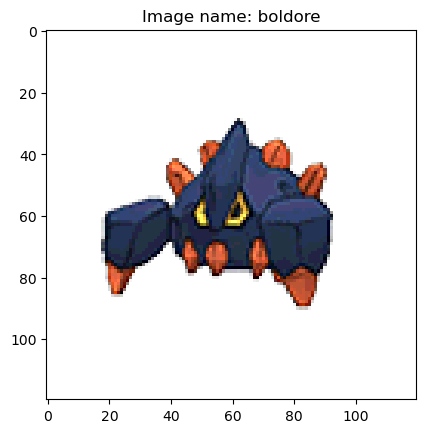

In [26]:
def find_user(user_dict: dict, name: str):
    """Find user by his name"""
    user_profile = user_dict.get(name)
    if user_profile is None:
        raise ValueError(f"User with name {name} not found in user list")
    return user_profile

# Load user data from JSON file
with open('user_demo.json') as json_file:
    data = json.load(json_file)

# Create a dictionary of user profiles keyed by user name
user_dict = {user['name']: user for user in data['users']}

# Find user profile for "yamine"
try:
    user_profile = find_user(user_dict, "yamine")
except ValueError as e:
    print(e)
else:
    # Get list of photos liked by "yamine"
    photo_liked_by_yamine = user_profile.get('name_photo_liked')
    print(f"Pokemons liked by Yamine: {photo_liked_by_yamine}")

    # Display images for each photo liked by "yamine"
    for image in photo_liked_by_yamine:
        try:
            # Load image file
            img_path = os.path.join("./dataset/images", f"{image}.png")
            img = mpimg.imread(img_path)

            # Display image and its name
            plt.imshow(img)
            plt.title(f"Image name: {image}")
            plt.show()
        except Exception as e:
            print(f"Error loading image {image}: {e}")


Nous allons récupérer les descriptions liées à ces photos

In [27]:
keep_df = df.loc[df['id'].isin(photo_liked_by_yamine)]
keep_df

,id,Description
17,arbok,is a Poison-type Pokémon introduced in Generat...
61,boldore,is a Rock-type Pokémon introduced in Generatio...
70,bronzor,is a dual-type Steel/Psychic Pokémon introduce...
81,cacturne,is a dual-type Grass/Dark Pokémon introduced i...


Nous utiliserons ces dernières comme requêtes pour recommander 4 photos à l'utilisateur, liées à l'image précédente.

In [29]:
# Retrieving the description of the last image
# We obtain:

description_test = keep_df['Description'].values[int(len(keep_df))-1]
print(f"description_test: {description_test}")

description_test: is a dual-type Grass/Dark Pokémon introduced in Generation III.


In [31]:
def vectorisation(text, wordbase):
    """Transforms a text string into a vector representation in the corpus base.
    
    Given a text string and a list of words in the corpus, this function counts 
    the occurrences of each word in the text and returns a vector whose entries 
    correspond to the word frequencies.
    
    Args:
        text (str): The input text to be transformed into a vector.
        wordbase (list of str): The list of words in the corpus used as a reference 
            for the vector representation.
    
    Returns:
        list of int: The vector representation of the input text in the corpus base.
    """
    return count(split(text), wordbase)


### b. Calcul de similarité

Pour évaluer la proximité de chaque description avec la requête, nous allons calculer un score pour chacune d'elles. Nous allons utiliser la similarité cosinus pour mesurer cette proximité. Pour chaque vecteur représentant un texte dans le corpus, c'est-à-dire pour chaque ligne de la matrice, nous allons calculer sa similarité avec le vecteur représentant la requête. La formule de similarité cosinus est la suivante :<br>
Sim(t) = <R, T> / ( ||R|| * ||T|| )<br>
Ici, T représente le vecteur de la description t (= la ligne M[t]), R représente le vecteur de la requête, <,> désigne le produit scalaire et || || la norme associée. Nous allons calculer cette valeur pour chaque description du corpus, puis sélectionner les meilleures réponses en fonction d'un nombre arbitraire de résultats souhaités. Les fonctions suivantes ont donc été définies :

Nous allons lui recommander 3 images par rapport à l'image précédente

In [34]:
import math
nbTop =  3

def scal(v1, v2):
    """ Function that calculates the dot product between two vectors of the same size and returns it."""
    scal = 0
    for i in range(len(v1)):
        scal += v1[i] * v2[i]
    return (scal)
  
    
def norm(v):
    """ Function that calculates the L2 norm of a vector and returns it."""
    n = math.sqrt(scal(v, v))
    if (n == 0):
        n = 1
    return (n)


def iMax(similarity):
    """ Function that returns the index of the maximum value in the list passed as a parameter."""
    imax = 0
    for i in range(1,len(similarity)):
        if (similarity[i] > similarity[imax]):
            imax = i
    return (imax)


def top(similarity, nbTop):
    """ Function that returns the list of indices of the nbTop largest elements
    in the list passed as a parameter (similarity), in descending order."""
    order = []
    cptTop = 0
    imax = iMax(similarity)
    while (similarity[imax] >= 0 and cptTop < nbTop):
        order.append(imax)
        # We set to -1 the element whose index we just took to no longer consider it
        similarity[imax] = -1
        cptTop += 1
        imax = iMax(similarity)
    return (order)


def research(request, matrix, wordbase):
    """ Function that takes a request as a string, the representative matrix of the corpus,
    and the list of tokens as parameters, and returns the list of indices of the descriptions
    in the corpus that most closely match the request. """
    # Vectorization of the request
    vector = vectorisation(request, wordbase)
    # Calculation of the list of similarity scores for each vector in the matrix
    similarity = []
    for v2 in matrix:
        similarity.append(scal(vector, v2) / (norm(vector) * norm(v2)))
    # We return the best results
    return (top(similarity, nbTop))


def printResearch(order, corpus):
    """ Function that, given the results of a query (list of indices) and the corpus used,
    displays the texts in the console, the most representative one first"""
    print("*\t*\t*\t*\t*\t*\t*\t*")
    print("*\t*\tResearch Result\t*\t*")
    print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
    for i in range(len(order)):
        print("*\t*\t*\t*\t*\t*\t*\t*")
        print("*\t*\tNumber" + str(i + 1) + " - Image " + str(order[i]) + "\t*\t*\t*")
        print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
        print(corpus[order[i]])
        printImage(str(order[i]))

    
def printImage(rows: str):
    """Displays the image corresponding to the found row"""
    current_id = df.iloc[int(rows)]["id"]
    print(f"current_id: {current_id}")
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()

## 2. Exécution de l'application

Ouverture des données

In [35]:
# Open dataset

# Get header csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )
# Delete unless columns
df = df.drop(['Type1', 'Type2'], axis=1)
df

/tmp/ipykernel_2088/3204077437.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3204077437.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


Rappelons les photos likées par l'utilisateur appelé "yamine"

Pokemons liked by Yamine: ['bronzor', 'arbok', 'cacturne', 'boldore']


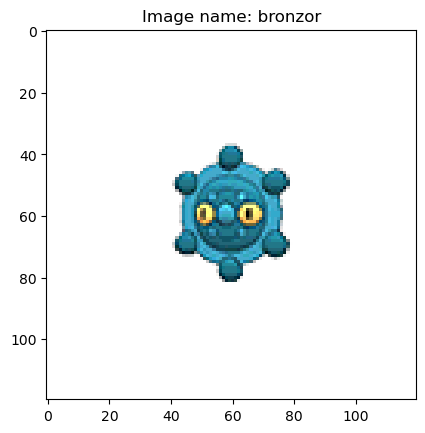

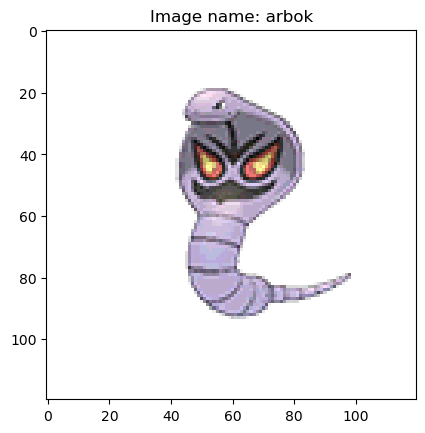

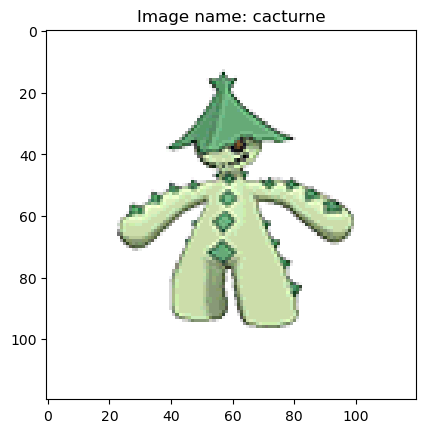

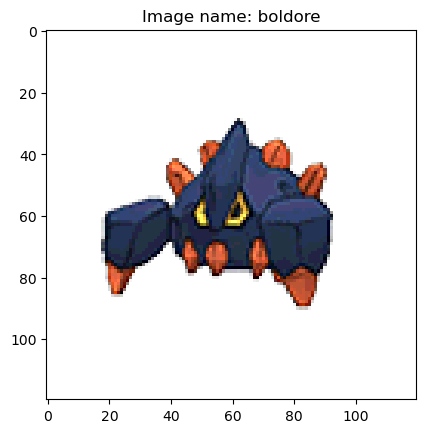

In [36]:
def find_user(user_dict: dict, name: str):
    """Find user by his name"""
    user_profile = user_dict.get(name)
    if user_profile is None:
        raise ValueError(f"User with name {name} not found in user list")
    return user_profile

# Load user data from JSON file
with open('user_demo.json') as json_file:
    data = json.load(json_file)

# Create a dictionary of user profiles keyed by user name
user_dict = {user['name']: user for user in data['users']}

# Find user profile for "yamine"
try:
    user_profile = find_user(user_dict, "yamine")
except ValueError as e:
    print(e)
else:
    # Get list of photos liked by "yamine"
    photo_liked_by_yamine = user_profile.get('name_photo_liked')
    print(f"Pokemons liked by Yamine: {photo_liked_by_yamine}")

    # Display images for each photo liked by "yamine"
    for image in photo_liked_by_yamine:
        try:
            # Load image file
            img_path = os.path.join("./dataset/images", f"{image}.png")
            img = mpimg.imread(img_path)

            # Display image and its name
            plt.imshow(img)
            plt.title(f"Image name: {image}")
            plt.show()
        except Exception as e:
            print(f"Error loading image {image}: {e}")


In [37]:
# Retreving relevant rows
keep_df = df.loc[df['id'].isin(photo_liked_by_yamine)]
print(f"row yamine liked: {keep_df}\n")

# Removing the relevant rows from the dataset
for id_photo in photo_liked_by_yamine:
    indexNames = df[df['id'] == id_photo].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames , inplace=True)
    
print(f"df with rows deletes: {df}")

row yamine liked:           id                                        Description
17     arbok  is a Poison-type Pokémon introduced in Generat...
61   boldore  is a Rock-type Pokémon introduced in Generatio...
70   bronzor  is a dual-type Steel/Psychic Pokémon introduce...
81  cacturne  is a dual-type Grass/Dark Pokémon introduced i...

df with rows deletes:                  id                                        Description
0         abomasnow  is a dual-type Grass/Ice Pokémon introduced in...
1              abra  is a Psychic-type Pokémon introduced in Genera...
2             absol  is a Dark-type Pokémon introduced in Generatio...
3          accelgor  is a Bug-type Pokémon introduced in Generation V.
4   aegislash-blade  is a dual-type Steel/Ghost Pokémon introduced ...
..              ...                                                ...
93          chansey  Chansey is a Normal-type Pokémon introduced in...
94        charizard  Charizard is a dual-type Fire/Flying Pokémon i...


In [39]:
# Number of lines to keep
line_number = len(df)//8 #  Voluntary choice to avoid array size problems
line_number

11

In [40]:
try:
        (matrix, wordbase) = preliminaryWork(df['Description'][:line_number])
        result = pd.DataFrame(np.array(matrix),columns=wordbase,index=[df['id'][:line_number]])
except KeyError:
        pass
result

,dual-typ,iv,grass/ic,psychic-typ,normal-typ,bug-typ,ii,steel/ghost,dragon/fli,pokémon,steel/rock,dark-typ,v,vi,iii,water-typ,gener,rock/fli,introduc
id,,,,,,,,,,,,,,,,,,,
abomasnow,0.546517,1.662094,1.662094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abra,0.000000,0.000000,0.000000,1.181641,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
absol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.662094,0.000000,0.000000,0.900594,0.000000,0.0,0.000000,0.0
accelgor,0.000000,0.000000,0.000000,0.000000,0.000000,1.662094,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.181641,0.000000,0.000000,0.000000,0.0,0.000000,0.0
aegislash-blade,0.546517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.662094,0.000000,0.0,0.000000,0.000000,0.000000,1.662094,0.000000,0.000000,0.0,0.000000,0.0
aerodactyl,0.546517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.662094,0.0
aggron,0.546517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.662094,0.000000,0.000000,0.000000,0.900594,0.000000,0.0,0.000000,0.0
aipom,0.000000,0.000000,0.000000,0.000000,1.662094,0.000000,1.662094,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
alakazam,0.000000,0.000000,0.000000,1.181641,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


Créons la liste des images à recommander


 Recommandation pour Yamine:


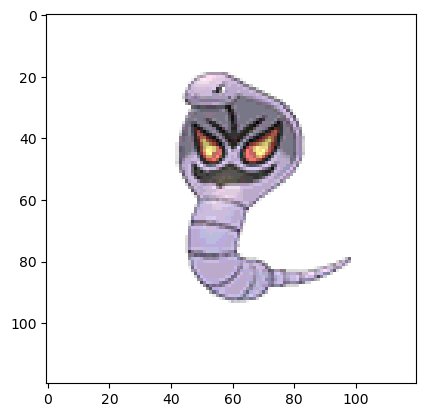

order: [0, 1, 2]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 0	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Grass/Ice Pokémon introduced in Generation IV.
current_id: abomasnow


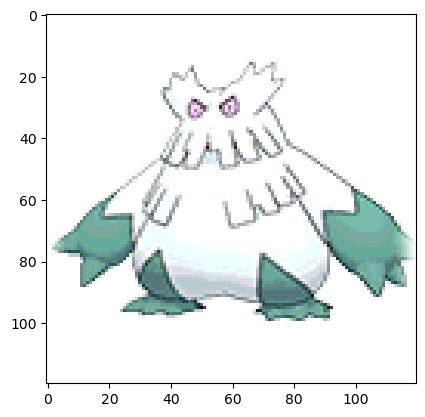

*	*	*	*	*	*	*	*
*	*	Number2 - Image 1	*	*	*
*	*	*	*	*	*	*	*


is a Psychic-type Pokémon introduced in Generation I.
current_id: abra


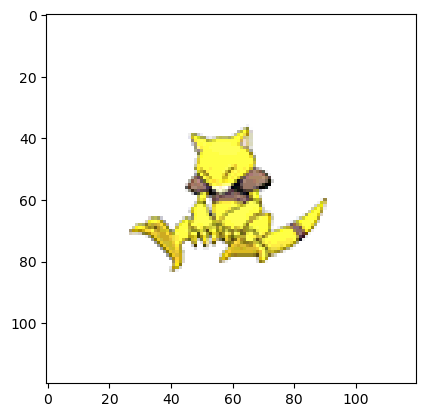

*	*	*	*	*	*	*	*
*	*	Number3 - Image 2	*	*	*
*	*	*	*	*	*	*	*


is a Dark-type Pokémon introduced in Generation III.
current_id: absol


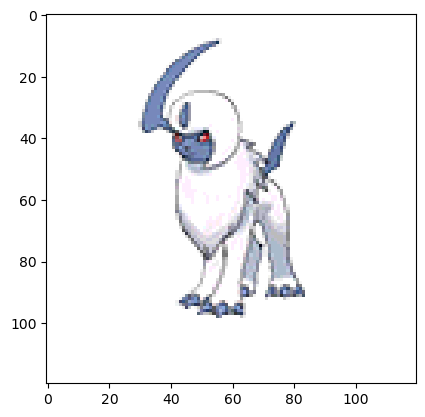


 Recommandation pour Yamine:


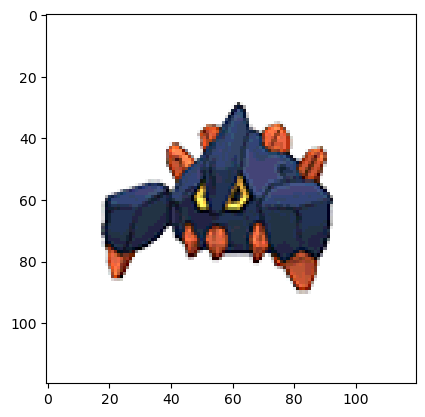

order: [3, 9, 0]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 3	*	*	*
*	*	*	*	*	*	*	*


is a Bug-type Pokémon introduced in Generation V.
current_id: accelgor


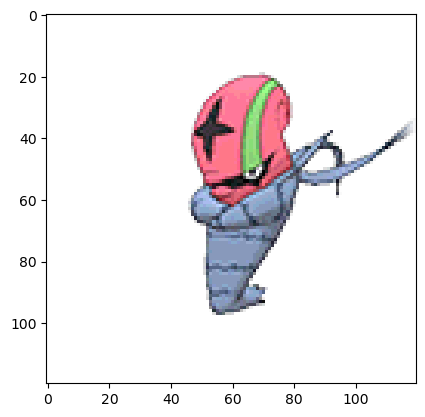

*	*	*	*	*	*	*	*
*	*	Number2 - Image 9	*	*	*
*	*	*	*	*	*	*	*


is a Water-type Pokémon introduced in Generation V.
current_id: alomomola


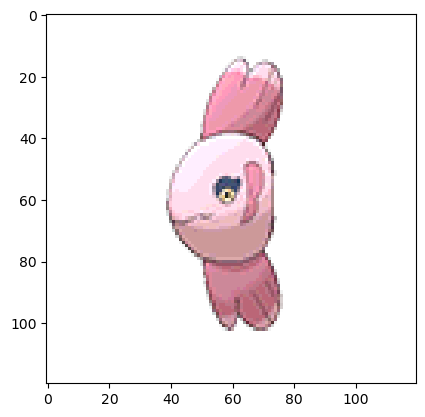

*	*	*	*	*	*	*	*
*	*	Number3 - Image 0	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Grass/Ice Pokémon introduced in Generation IV.
current_id: abomasnow


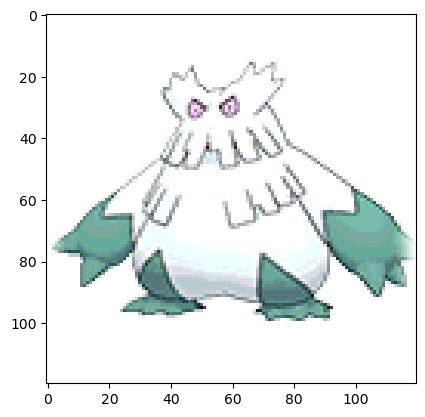


 Recommandation pour Yamine:


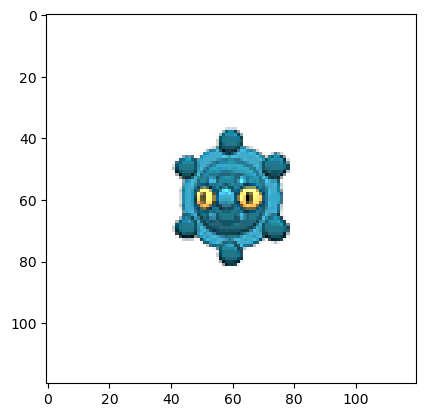

order: [0, 5, 6]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 0	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Grass/Ice Pokémon introduced in Generation IV.
current_id: abomasnow


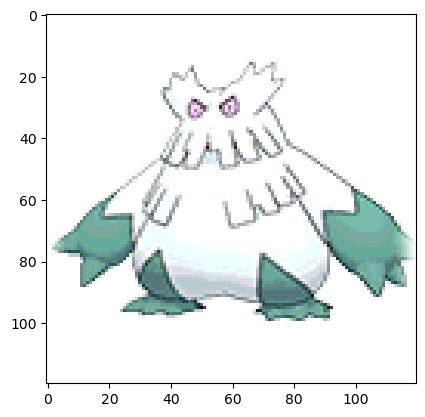

*	*	*	*	*	*	*	*
*	*	Number2 - Image 5	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Rock/Flying Pokémon introduced in Generation I.
current_id: aerodactyl


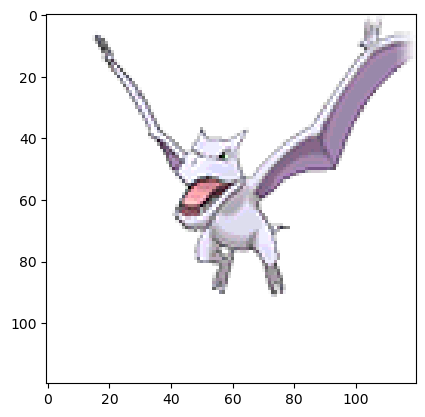

*	*	*	*	*	*	*	*
*	*	Number3 - Image 6	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Steel/Rock Pokémon introduced in Generation III.
current_id: aggron


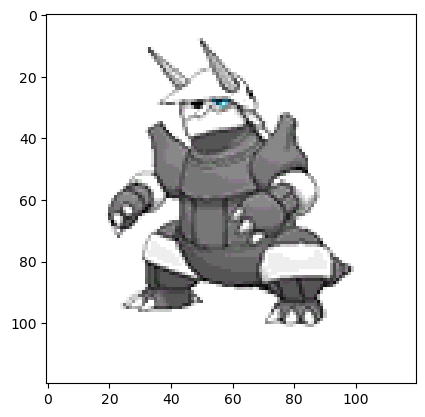


 Recommandation pour Yamine:


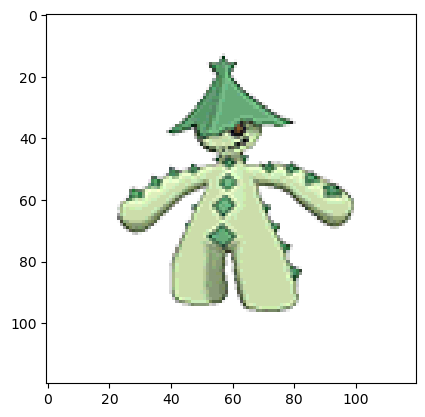

order: [6, 10, 2]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 6	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Steel/Rock Pokémon introduced in Generation III.
current_id: aggron


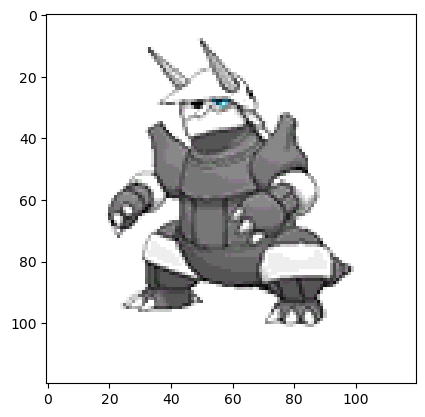

*	*	*	*	*	*	*	*
*	*	Number2 - Image 10	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Dragon/Flying Pokémon introduced in Generation III.
current_id: altaria


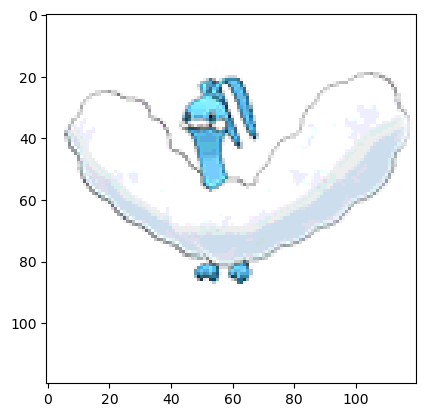

*	*	*	*	*	*	*	*
*	*	Number3 - Image 2	*	*	*
*	*	*	*	*	*	*	*


is a Dark-type Pokémon introduced in Generation III.
current_id: absol


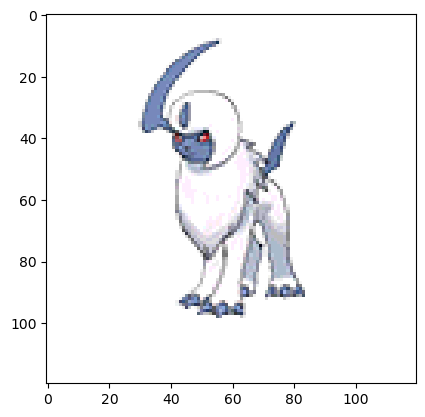

In [41]:
# Preload images
images = {}
for row in keep_df.itertuples():
    img = mpimg.imread(f"dataset/images/{row.id}.png")
    images[row.id] = img

# Create a new dataframe with the relevant rows
line_condition = keep_df['id'].isin(photo_liked_by_yamine)
new_df = keep_df[line_condition]

# Iterate over the rows in the new dataframe
for row in new_df.itertuples():
    # Get the relevant information from the row
    current_description = row.Description
    current_id = row.id
    
    # Display the image
    print("\n Recommandation pour Yamine:")
    imgplot = plt.imshow(images[current_id])
    plt.show()
    
    # Recherche
    order = research(current_description, matrix, wordbase)
    print(f"order: {order}")
    printResearch(order, df['Description'])


Ainsi pour chaque image liké par l'utilisateur yamine, nous avons des images à lui recommander

## 3. Application

/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



user_list_position: 3
L'utlisateur: snippy-celadon-tuatara

 a aimé la photo


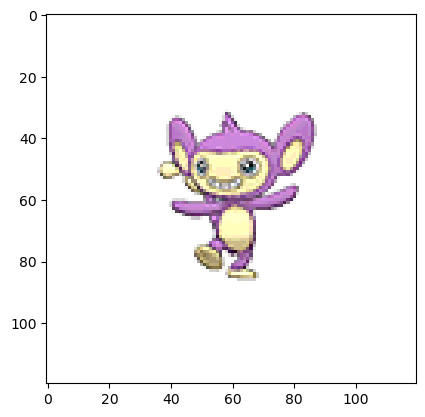


 Le programme lui recommande: 


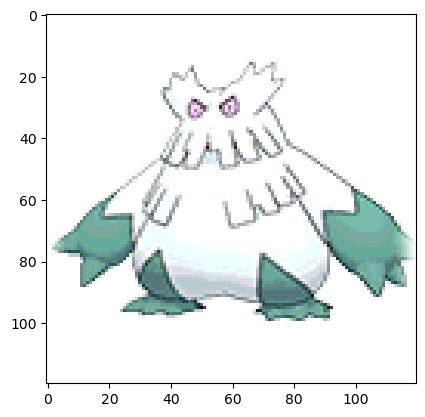

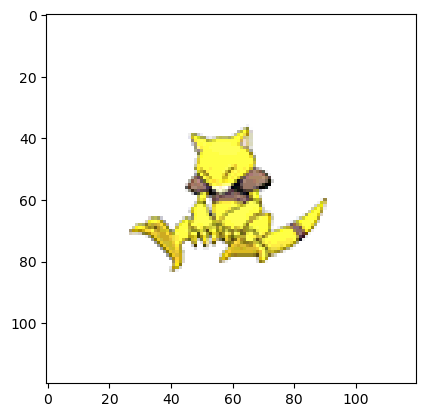

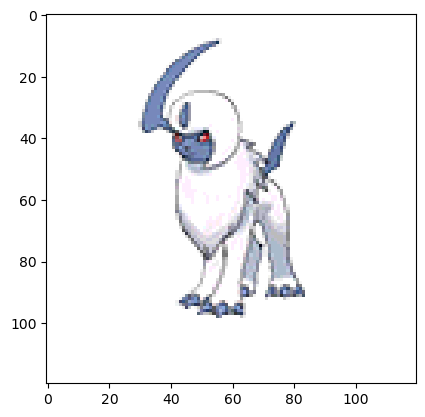


 a aimé la photo


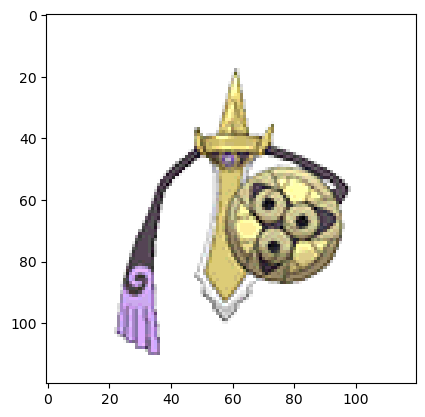


 Le programme lui recommande: 


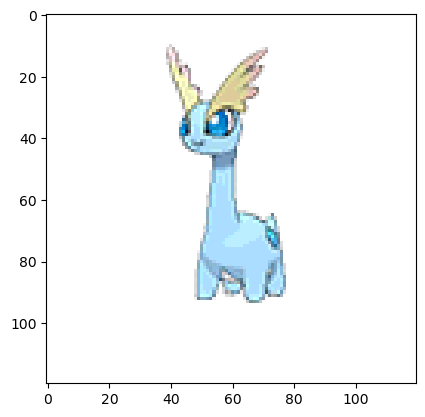

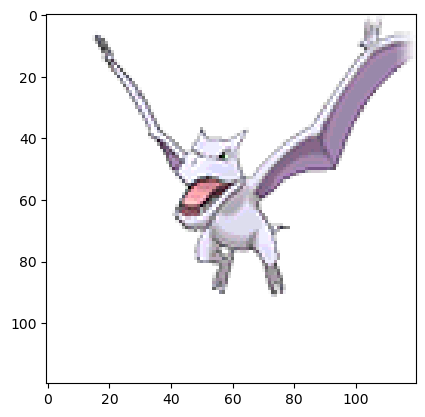

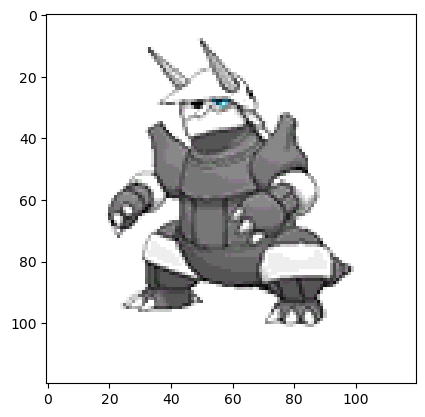

In [45]:
# "Hyperparameters"
stop_words = set(stopwords.words('english'))
# We can shape the list of words not taken into account
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()
# Total number of users
user_max = 4
# Number of recommendations per image
nbTop =  4
# Line reduction coefficient
coeff = 8

def split(Description):
    """ Function that takes a text (an image description) as input and returns
    the list of its words that have been filtered and transformed: lemmatized and stemmed"""

    # Tokenization ************************************************************
    # Splitting the text into words (words is a list of strings)
    words = word_tokenize(str(Description))

    # Stop-words **************************************************************
    # Filtering words: we remove from words those that are contained in 
    # stop_words because they are supposed to have too little meaning.
    # (common words, linking words, punctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)

    # Lemmatization *************************************************************
    # Transforming words into a single keyword (lemma) representing them. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transforming words into a single root representing them. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]

    return words_stemmed


def count(words, wordbase):
    """Function that takes as input a text that has been split into words and the list 
    of tokens in the corpus, and returns the vector containing the number of occurrences 
    in the text of each token in the corpus."""
    
    vector = [0 for i in range(len(wordbase))]
    for i in range(len(wordbase)):
        if wordbase[i] in words:
            vector[i] += 1
    return vector


def preliminaryWork(corpus):
    """Function that takes as input a corpus of descriptions in the form of a 
    list of strings, and returns the list of words used as a basis for representing 
    the texts that make it up, and the matrix of these texts in this basis, 
    with the coordinates calculated using the TF-IDF formula."""
    
    # Splitting, sorting and transforming texts (see split function)
    corpus_words = []
    for i in range(len(corpus)):
        corpus_words.append(split(corpus[i]))
        
    # Constructing the list of words in the corpus (intersection of the words in the 
    # texts). Wordset is an object of type set, which is useful because it allows 
    # for set intersection, but it is not ordered. We therefore build wordbase 
    # from the words in wordset so that we can associate 1 word with 1 coordinate.
    wordset = set()
    for words in corpus_words:
        wordset = wordset.union(set(words))
    wordbase = [word for word in wordset]
    
    # Constructing the matrix representing the texts in the wordbase. We initialize 
    # it with the vectors whose coordinates are the raw counts.
    matrix = []
    for words in corpus_words:
        matrix.append(count(words, wordbase))
        
    # Calculating the number of texts that contain each word
    nt = [0 for m in range(len(wordbase))]
    for m in range(len(wordbase)):
        for line in matrix:
            if line[m] > 0:
                nt[m] += 1
    
    # Calculating the tf-idf of each word in each text
    # TF(word in a text) = log(1 + number of occurrences of this word in this text)
    # IDF(word) = log(total number of texts / number of texts containing this word)
    # TF-IDF(word in a text) = TF(word in a text) * IDF(word)
    for t in range(len(matrix)):
        for m in range(len(wordbase)):
            matrix[t][m] = math.log(1 + matrix[t][m]) * math.log(len(corpus) / nt[m])
            
    return (matrix, wordbase)


def vectorisation(text, wordbase):
    """Transforms a text string into a vector representation in the corpus base.
    
    Given a text string and a list of words in the corpus, this function counts 
    the occurrences of each word in the text and returns a vector whose entries 
    correspond to the word frequencies.
    
    Args:
        text (str): The input text to be transformed into a vector.
        wordbase (list of str): The list of words in the corpus used as a reference 
            for the vector representation.
    
    Returns:
        list of int: The vector representation of the input text in the corpus base.
    """
    return count(split(text), wordbase)

def scal(v1, v2):
    """ Function that calculates the dot product between two vectors of the same size and returns it."""
    scal = 0
    for i in range(len(v1)):
        scal += v1[i] * v2[i]
    return (scal)
  
    
def norm(v):
    """ Function that calculates the L2 norm of a vector and returns it."""
    n = math.sqrt(scal(v, v))
    if (n == 0):
        n = 1
    return (n)


def iMax(similarity):
    """ Function that returns the index of the maximum value in the list passed as a parameter."""
    imax = 0
    for i in range(1,len(similarity)):
        if (similarity[i] > similarity[imax]):
            imax = i
    return (imax)


def top(similarity, nbTop):
    """ Function that returns the list of indices of the nbTop largest elements
    in the list passed as a parameter (similarity), in descending order."""
    order = []
    cptTop = 0
    imax = iMax(similarity)
    while (similarity[imax] >= 0 and cptTop < nbTop):
        order.append(imax)
        # We set to -1 the element whose index we just took to no longer consider it
        similarity[imax] = -1
        cptTop += 1
        imax = iMax(similarity)
    return (order)


def research(request, matrix, wordbase):
    """ Function that takes a request as a string, the representative matrix of the corpus,
    and the list of tokens as parameters, and returns the list of indices of the descriptions
    in the corpus that most closely match the request. """
    # Vectorization of the request
    vector = vectorisation(request, wordbase)
    # Calculation of the list of similarity scores for each vector in the matrix
    similarity = []
    for v2 in matrix:
        similarity.append(scal(vector, v2) / (norm(vector) * norm(v2)))
    # We return the best results
    return (top(similarity, nbTop))


def printResearch(order, corpus):
    """ Function that, given the results of a query (list of indices) and the corpus used,
    displays the texts in the console, the most representative one first"""
    print("*\t*\t*\t*\t*\t*\t*\t*")
    print("*\t*\tResearch Result\t*\t*")
    print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
    for i in range(len(order)):
        print("*\t*\t*\t*\t*\t*\t*\t*")
        print("*\t*\tNumber" + str(i + 1) + " - Image " + str(order[i]) + "\t*\t*\t*")
        print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
        print(corpus[order[i]])
        printImage(str(order[i]))

    
def printImage(rows: str):
    """Displays the image corresponding to the found row"""
    current_id = df.iloc[int(rows)]["id"]
    print(f"current_id: {current_id}")
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()
    
    
def random_number():
    return random.randint(1, 5)


def random_number_with_parameter(parameter):
    """ Generate random number with a limite"""
    val = random.randint(1, parameter)
    return val


def build_user(user_name: str, list_liked_image: list):
    """Build incidents with parameters."""
    user = {
        "name": user_name,
        "id_photo_liked": list_liked_image,
        "recommandations": []
    }
    return user
   
def generate_data():
    """Generate and return data, save it on users_data.json"""
    
    data = {"users": []}
    user_counter = 0

    while user_counter < user_max:
        list_liked_image = generate_liked_image(random_number())
        data["users"].append(build_user(namegenerator.gen(), list_liked_image))
        user_counter = user_counter + 1
                             
    with open("./users_data.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)


def find_user(user_list: dict, name: str):
    """Find user by his name"""
    
    user_profile = {}
    position_in_list = 0
    for user in user_list:
        if user.get('name') == name:
            user_profile = user
            good_position = position_in_list
        position_in_list = position_in_list + 1
    
    return user_profile, good_position
        

def save_recommandation(user, origin_photo, recommandation):
    """Save recommandation"""
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    user_profile, position_in_list = find_user(data.get('users'), user)
    dict_recommandation = {
        "origin_photo": origin_photo,
        "recommandations":  recommandation
    }
    data["users"][position_in_list].get("recommandations").append(dict_recommandation)
    with open('users_data.json', 'w') as outfile:
        json.dump(data, outfile)
        

def prepare_df():
    """ Remove some column"""
    df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    # Sdelete unless columns
    df = df.drop(['Type1','Type2'], axis=1)
    line_number = len(df)//coeff
    df = df[:line_number]
    return df


def recommandation():
    # Load data
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    # For each user
    for user in data.get('users'):
        user_name = user.get("name")
        photo_liked_by_user = user.get('id_photo_liked')
        df = prepare_df() # Creating the dataFrame
        keep_df = df.loc[df['id'].isin(photo_liked_by_user)]
        (matrix, wordbase) = preliminaryWork(df['Description'][:len(df)])
        # Recommendation process for each photo
        for photo in photo_liked_by_user:
            line_condition = keep_df['id'] == photo
            new_df = keep_df[line_condition]
            current_description = new_df['Description'].values[0]
            current_id = new_df['id'].values[0]
            # Recherche
            order = research(current_description, matrix, wordbase)
            recommandation = []
            first_recommandation = True
            for row in order:
                if first_recommandation:
                    first_recommandation = False
                else:
                    recommandation.append(str(df.iloc[int(row)]["id"]))
            save_recommandation(user_name, current_id, recommandation)
            

def show_random_user_recommandation():
    """Show random recommandation"""
    # Load data
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    # Select random user
    user_list_position = random_number_with_parameter(len(data.get("users"))) - 1
    print(f"user_list_position: {user_list_position}")
    user =  data.get("users")[user_list_position]
    # For each photo liked by this user
    print(f"L'utlisateur: {user.get('name')}")
    for photo in user.get("recommandations"):
        print("\n a aimé la photo")
        img = mpimg.imread(f"./dataset/images/{photo.get('origin_photo')}.png")
        imgplot = plt.imshow(img)
        plt.show()
        print("\n Le programme lui recommande: ")
        for recommandation in photo.get("recommandations"):
            img = mpimg.imread(f"./dataset/images/{recommandation}.png")
            imgplot = plt.imshow(img)
            plt.show()


def generate_liked_image(number_image, coeff=10):
    # get header csv
    df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending=True, inplace=True)  # inplace=True pour trier df directement

    line_number = len(df) // coeff
    # delete unless columns
    df = df.drop(['Type1', 'Type2'], axis=1)[:line_number]
    list_liked_image = []
    
    if line_number < number_image:
        print("The number of images is too small compared to the requested amount")
        return list_liked_image
    
    while len(list_liked_image) < number_image:
        current_id = random.choice(df['id'])
        list_liked_image.append(current_id)
    
    return list_liked_image

    
generate_data()
recommandation()
show_random_user_recommandation()

# Méthode par Text-Mining combinée à la classification

## Objectif :

Cette méthode utilise les mêmes principes de text-mining que pour un moteur de recherche, mais au lieu de cela, elle implique la création de plusieurs classifieurs. Le processus est similaire, car nous travaillons toujours avec les descriptions de photos, mais cette fois, chaque description est associée à deux valeurs possibles (aimée ou non aimée par les utilisateurs).

### Sources :

Cette présentation a été conçue grâce aux documentations suivantes :

* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* http://www.nltk.org/

In [46]:
# imports

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import csv
import math
import random
import json
import namegenerator

sklearn.show_versions()
import nltk
from nltk.corpus import stopwords # list of words not taken into account
from nltk.tokenize import word_tokenize # tokenization function
from nltk.stem import WordNetLemmatizer # lemmatization function
from nltk.stem.porter import PorterStemmer # stemming function
import math

from sklearn.preprocessing import LabelEncoder


System:
    python: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]
executable: /bin/python3
   machine: Linux-5.4.72-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.2
   setuptools: 66.0.0
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.5.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/morgane/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: 

## A. Pré-traitement des données
### 1. Ouverture des données

In [70]:
# Open dataset

# Get header csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )
# Delete unless columns
df = df.drop(['Type1', 'Type2'], axis=1)
df

/tmp/ipykernel_2088/3204077437.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3204077437.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


### 2. Fabrication d'un profil utilisateur ayant liké et disliké des images

Nous allons simuler un utilisateur qui donnera aléatoirement des likes à un certain nombre de photos et des dislikes à d'autres photos. En raison de contraintes de temps, cette sélection sera effectuée de manière aléatoire, ce qui pourrait affecter l'efficacité de notre classifieur.

In [71]:
# Constants
CSV_FILE_PATH = "./dataset/pokemon.csv"
USER_MAX = 1
COEFF = 2
NUMBER_IMAGE_LIKED = 10
NUMBER_IMAGE_DISLIKED = 8

def random_number_with_parameter(parameter):
    """Generate random number with a limit"""
    return random.randint(1, parameter)

def build_user(user_name: str, list_liked_image: list, list_disliked_image: list):
    """Build user with parameters."""
    return {
        "name": user_name,
        "id_photo_liked": list_liked_image,
        "id_photo_disliked": list_disliked_image,
        "recommandations": []
    }

def generate_liked_image(df, line_number, number_image):
    """Generate a list of liked image ids."""
    df = df.drop(['Type1', 'Type2'], axis=1).head(line_number)
    list_liked_image = df['id'].sample(number_image).tolist()
    return list_liked_image

def generate_disliked_image(df, list_liked_image, line_number, number_image):
    """Generate a list of disliked image ids."""
    df = df.drop(['Type1', 'Type2'], axis=1).head(line_number)
    list_disliked_image = df.loc[~df['id'].isin(list_liked_image), 'id'].sample(number_image).tolist()
    return list_disliked_image

def generate_data():
    """Generate and return data, save it on users_data.json"""

    df = pd.read_csv(CSV_FILE_PATH, sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending=True, inplace=True)

    line_number = len(df) // COEFF

    if line_number < NUMBER_IMAGE_LIKED + NUMBER_IMAGE_DISLIKED:
        print("Le nombre d'images est trop petit par rapport au nombre demandé.")
        return

    if NUMBER_IMAGE_LIKED + NUMBER_IMAGE_DISLIKED > len(df):
        print("Le nombre d'images demandé est supérieur au nombre total d'images disponibles.")
        return

    data = {"users": []}

    for _ in range(USER_MAX):
        list_liked_image = generate_liked_image(df, line_number, NUMBER_IMAGE_LIKED)
        list_disliked_image = generate_disliked_image(df, list_liked_image, line_number, NUMBER_IMAGE_DISLIKED)
        data["users"].append(build_user(namegenerator.gen(), list_liked_image, list_disliked_image))

    with open("user_demo_version_classifieur.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

generate_data()


/tmp/ipykernel_2088/1086337478.py:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(CSV_FILE_PATH, sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/1086337478.py:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(CSV_FILE_PATH, sep=',', error_bad_lines=False, warn_bad_lines=False)


In [72]:
import json

with open('user_demo_version_classifieur.json') as json_file:
    data = json.load(json_file)

user_profile = next((user for user in data['users'] if user['name'] == name), None)
if user_profile is not None:
    photo_liked_by_user = user_profile.get('id_photo_liked')
    print(f"nombre de photo likées: {len(photo_liked_by_user)}")
    photo_disliked_by_user = user_profile.get('id_photo_disliked')
    print(f"nombre de photo dislikées: {len(photo_disliked_by_user)}")
else:
    print(f"Le nom d'utilisateur {name} n'a pas été trouvé dans la liste des utilisateurs.")


Le nom d'utilisateur cheeky-aquamarine-booby n'a pas été trouvé dans la liste des utilisateurs.


In [73]:
print("récupération des photos likées")
df_liked = df.loc[df['id'].isin(photo_liked_by_user)]
df_liked["avis"] = "liked"
df_liked

récupération des photos likées


/tmp/ipykernel_2088/2401011666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liked["avis"] = "liked"


,id,Description,avis
2,absol,is a Dark-type Pokémon introduced in Generatio...,liked
3,accelgor,is a Bug-type Pokémon introduced in Generation V.,liked
9,alomomola,is a Water-type Pokémon introduced in Generati...,liked
11,amaura,is a dual-type Rock/Ice Pokémon introduced in ...,liked
18,arcanine,is a Fire-type Pokémon introduced in Generatio...,liked
25,aron,is a dual-type Steel/Rock Pokémon introduced i...,liked
28,aurorus,is a dual-type Rock/Ice Pokémon introduced in ...,liked
32,azumarill,is a dual-type Water/Fairy Pokémon introduced ...,liked
42,bayleef,NaN,liked
43,beartic,NaN,liked


In [74]:
print("récupération des photos likées")
df_disliked = df.loc[df['id'].isin(photo_disliked_by_user)]
df_disliked["avis"] = 'disliked'
df_disliked

récupération des photos likées


/tmp/ipykernel_2088/3446105770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disliked["avis"] = 'disliked'


,id,Description,avis
1,abra,is a Psychic-type Pokémon introduced in Genera...,disliked
8,alakazam,is a Psychic-type Pokémon introduced in Genera...,disliked
20,archen,is a dual-type Rock/Flying Pokémon introduced ...,disliked
24,aromatisse,is a Fairy-type Pokémon introduced in Generati...,disliked
26,articuno,is a dual-type Ice/Flying Legendary Pokémon in...,disliked
29,avalugg,is an Ice-type Pokémon introduced in Generatio...,disliked
44,beautifly,is a dual-type Bug/Flying Pokémon introduced i...,disliked
46,beheeyem,NaN,disliked


In [75]:
frames = [df_liked, df_disliked]
result = pd.concat(frames)
result

,id,Description,avis
2,absol,is a Dark-type Pokémon introduced in Generatio...,liked
3,accelgor,is a Bug-type Pokémon introduced in Generation V.,liked
9,alomomola,is a Water-type Pokémon introduced in Generati...,liked
11,amaura,is a dual-type Rock/Ice Pokémon introduced in ...,liked
18,arcanine,is a Fire-type Pokémon introduced in Generatio...,liked
25,aron,is a dual-type Steel/Rock Pokémon introduced i...,liked
28,aurorus,is a dual-type Rock/Ice Pokémon introduced in ...,liked
32,azumarill,is a dual-type Water/Fairy Pokémon introduced ...,liked
42,bayleef,NaN,liked
43,beartic,NaN,liked


Ainsi, à partir des descriptions des photos aimées et non aimées par notre utilisateur, nous pouvons générer deux classes de photos distinctes : les photos aimées et les photos non aimées.

In [77]:
# Count the categories (like/dislike)
# Display the results
classes = result["avis"]
print(classes.value_counts())

liked       10
disliked     8
Name: avis, dtype: int64


### 3. Mise en forme des données
On transpose les labels de la classes en valeur binaire:  
0 = disliked and 1 = liked et les mettres dans une liste Y

In [78]:
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

Récupération des descriptions des photos likées ou dislikés de l'utilisateur

In [81]:
# Storage of descriptions
descriptions = result["Description"]
print(descriptions)

2     is a Dark-type Pokémon introduced in Generatio...
3     is a Bug-type Pokémon introduced in Generation V.
9     is a Water-type Pokémon introduced in Generati...
11    is a dual-type Rock/Ice Pokémon introduced in ...
18    is a Fire-type Pokémon introduced in Generatio...
25    is a dual-type Steel/Rock Pokémon introduced i...
28    is a dual-type Rock/Ice Pokémon introduced in ...
32    is a dual-type Water/Fairy Pokémon introduced ...
42                                                  NaN
43                                                  NaN
1     is a Psychic-type Pokémon introduced in Genera...
8     is a Psychic-type Pokémon introduced in Genera...
20    is a dual-type Rock/Flying Pokémon introduced ...
24    is a Fairy-type Pokémon introduced in Generati...
26    is a dual-type Ice/Flying Legendary Pokémon in...
29    is an Ice-type Pokémon introduced in Generatio...
44    is a dual-type Bug/Flying Pokémon introduced i...
46                                              

Nous allons appliquer le même traitement de text-mining que dans l'approche précédente.

In [83]:
# Procedure that replaces numbers with 'numbr'
processed = descriptions.str.replace(r'\d+(.\d+)?', 'numbr')

# Removing punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replacing multiple spaces with single spaces
processed = processed.str.replace(r'\s+', ' ')

# Converting all words to lowercase
processed = processed.str.lower()

/tmp/ipykernel_2088/3445627401.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = descriptions.str.replace(r'\d+(.\d+)?', 'numbr')
/tmp/ipykernel_2088/3445627401.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = processed.str.replace(r'[^\w\d\s]', ' ')
/tmp/ipykernel_2088/3445627401.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = processed.str.replace(r'\s+', ' ')


In [84]:
# Print after après preprocessing 1
print(processed)

2     is a dark type pokémon introduced in generatio...
3     is a bug type pokémon introduced in generation v 
9     is a water type pokémon introduced in generati...
11    is a dual type rock ice pokémon introduced in ...
18    is a fire type pokémon introduced in generatio...
25    is a dual type steel rock pokémon introduced i...
28    is a dual type rock ice pokémon introduced in ...
32    is a dual type water fairy pokémon introduced ...
42                                                  NaN
43                                                  NaN
1     is a psychic type pokémon introduced in genera...
8     is a psychic type pokémon introduced in genera...
20    is a dual type rock flying pokémon introduced ...
24    is a fairy type pokémon introduced in generati...
26    is a dual type ice flying legendary pokémon in...
29    is an ice type pokémon introduced in generatio...
44    is a dual type bug flying pokémon introduced i...
46                                              

Nettoyage des données: STOP-WORDS, STEMMING

In [86]:
# "Hyperparameters"
stop_words = set(stopwords.words('english'))
# We can shape the list of words not taken into account
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()

def split(Description):
    """ Function that takes a text (an image description) as input and returns
    the list of its words that have been filtered and transformed: lemmatized and stemmed"""

    # Tokenization ************************************************************
    # Splitting the text into words (words is a list of strings)
    words = word_tokenize(str(Description))

    # Stop-words **************************************************************
    # Filtering words: we remove from words those that are contained in 
    # stop_words because they are supposed to have too little meaning.
    # (common words, linking words, punctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)

    # Lemmatization *************************************************************
    # Transforming words into a single keyword (lemma) representing them. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transforming words into a single root representing them. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]
    words_stemmed = listToString(words_stemmed)
    return words_stemmed

def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))

# delete stopword
stop_words = set(stopwords.words('english'))
processed = processed.apply(split)

In [87]:
# Affiche après Pré-traitement
print(processed)

2                  dark type pokémon introduc gener iii
3                     bug type pokémon introduc gener v
9                   water type pokémon introduc gener v
11         dual type rock ice pokémon introduc gener vi
18                     fire type pokémon introduc gener
25      dual type steel rock pokémon introduc gener iii
28         dual type rock ice pokémon introduc gener vi
32      dual type water fairi pokémon introduc gener ii
42                                                  nan
43                                                  nan
1                   psychic type pokémon introduc gener
8                   psychic type pokémon introduc gener
20          dual type rock fli pokémon introduc gener v
24                 fairi type pokémon introduc gener vi
26    dual type ice fli legendari pokémon introduc g...
29                   ice type pokémon introduc gener vi
44         dual type bug fli pokémon introduc gener iii
46                                              

### 4. Génération du Bag-of-words

In [89]:
# generate Bag-of-words
bag = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        bag.append(w)

bag = nltk.FreqDist(bag)

In [92]:
# Print most commons words
print('Number of words: {}'.format(len(bag)))
print('Most commons words: {}'.format(bag.most_common(15)))
pd.DataFrame([bag.most_common(15)])

Number of words: 21
Most commons words: [('type', 15), ('pokémon', 15), ('introduc', 15), ('gener', 15), ('dual', 7), ('rock', 4), ('ice', 4), ('vi', 4), ('iii', 3), ('v', 3), ('nan', 3), ('fli', 3), ('bug', 2), ('water', 2), ('fairi', 2)]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(type, 15)","(pokémon, 15)","(introduc, 15)","(gener, 15)","(dual, 7)","(rock, 4)","(ice, 4)","(vi, 4)","(iii, 3)","(v, 3)","(nan, 3)","(fli, 3)","(bug, 2)","(water, 2)","(fairi, 2)"


In [94]:
# Using the 2500 most common words as references.
word_features = list(bag.keys())[:2500]

In [95]:
# Function that returns the words present in the string and in word_features
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [97]:
# Automating the find_features function
messages = list(zip(processed, Y))
# Sampling data
seed=1
np.random.seed = seed
np.random.shuffle(messages)
featuresets = [(find_features(text), label) for (text, label) in messages]

### 5. Constitution du training set et du testing set 

In [99]:
# Setting up:
# - training set = used by the algorithm to train itself
# - testing set = used to measure the final model's error on data it has never seen before
from sklearn import model_selection

# Splitting the data: 75% for training set and 25% for testing set
training, testing = model_selection.train_test_split(featuresets, test_size=0.25, random_state=seed)
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)
print(f"taille du jeu de données de training: {len(training)}")
print(f"taille du jeu de données de testing: {len(testing)}")

# Training for meta-models (cf section 4.2)
training_n2=training
training_n3=training

taille du jeu de données de training: 13
taille du jeu de données de testing: 5


### 6. Aperçu visuel du jeu de données de testing

In [100]:
pd.DataFrame([testing])

,0,1,2,3,4
0,"({'dark': False, 'type': True, 'pokémon': True...","({'dark': False, 'type': True, 'pokémon': True...","({'dark': False, 'type': True, 'pokémon': True...","({'dark': False, 'type': True, 'pokémon': True...","({'dark': False, 'type': True, 'pokémon': True..."


On a deux matrices contenant chacune des sous listes de mots de chaque descriptions avec le label (liké ou disliké)

## B. Apprentissage supervisé

### 1. Classification avec Scikit-Learn

La partie consiste à évaluer plusieurs classifieurs de Sklearn en faisant varier certains hyperparamètres pour déterminer le meilleur modèle. L'indicateur utilisé pour évaluer les performances des modèles est l'exactitude (accuracy), qui est définie par la formule suivante:

$$(TP+TN)/(TP+TN+FP+FN)$$

où TP correspond aux vrais positifs, TN aux vrais négatifs, FP aux faux positifs et FN aux faux négatifs. Nous conservons la plupart des hyperparamètres par défaut, en ne faisant varier que certains d'entre eux pour mesurer l'impact sur l'exactitude du modèle.
 
- TP = Vrai positif 
- TN = Vrai négatif 
- FP = Faux posifif 
- FN = Faux négatif

SOURCE: https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

In [101]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier

#### 1.a) Test du classifieur SVC (Support Vector Classification)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [103]:
# Classifier configuration
# (kernel = poly/rbf/sigmoid/linear/precomputed/callable)
model = SklearnClassifier(SVC(kernel='linear'))

# Training the model
model.train(training)

# Testing the classifier using the "testing" sample
accuracy = nltk.classify.accuracy(model, testing)*100
accuracy = (round(accuracy,2))
print("The classification accuracy is "+str(accuracy)+"%")

The classification accuracy is 60.0%


Essayons à présent de faire varier les hyperparamètres afin d'optimiser le classifieur SVC

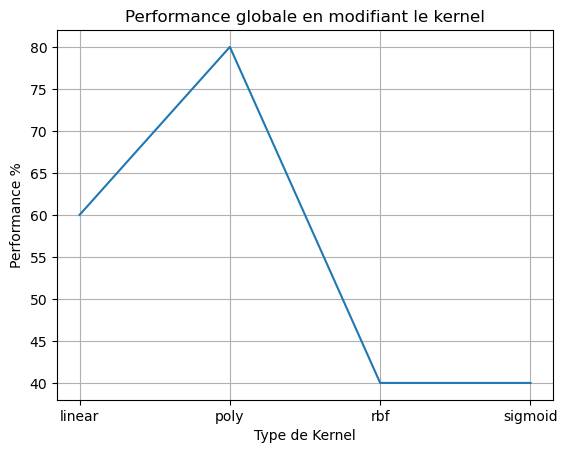

In [105]:
# Parameters
K=['linear','poly','rbf','sigmoid']

AccuracyTAB=[]

# Test
for i in range(len(K)):
    model = SklearnClassifier(SVC(kernel = K[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Print
plt.grid(True)
plt.plot(K,AccuracyTAB)
plt.title("Performance globale en modifiant le kernel")
plt.xlabel("Type de Kernel")
plt.ylabel("Performance %")
plt.show()

Le graphique permet de visualiser le choix optimal de l'hyperparamètre "kernel" pour l'algorithme de classification SVC dans ce cas d'utilisation. Bien qu'il existe d'autres hyperparamètres, nous ne les modifions pas.

Nous allons maintenant reproduire cette méthode pour plusieurs autres algorithmes de classification.

#### 1.b) Test du classifieur DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [113]:
model = SklearnClassifier(DecisionTreeClassifier())
#  Train the model
model.train(training)

accuracy = nltk.classify.accuracy(model, testing)*100
accuracy = (round(accuracy,2))
print ("La précision de classification est de "+str(accuracy)+"%")

La précision de classification est de 80.0%


#### 1.c) Test du classifieur RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

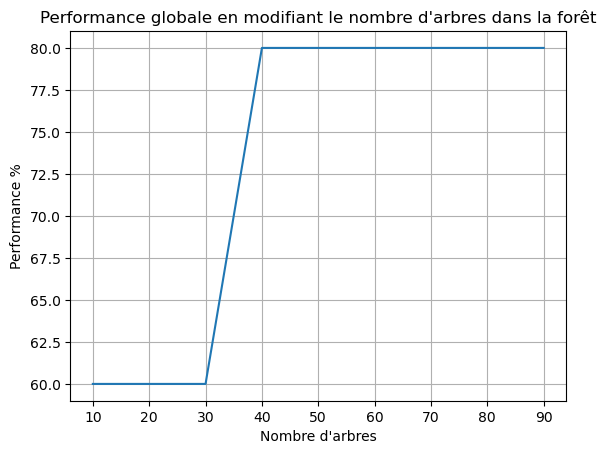

In [116]:
# Parameters
n_estimators = range(10, 100, 10)

# Results
accuracy_tab = []

# Testing the classifier by modifying the number of trees in the forest
for n in n_estimators:
    model = SklearnClassifier(RandomForestClassifier(n_estimators=n))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing) * 100
    accuracy_tab.append(round(accuracy, 2))

# Display curves
plt.grid(True)
plt.plot(n_estimators, accuracy_tab)
plt.title("Performance globale en modifiant le nombre d'arbres dans la forêt")
plt.xlabel("Nombre d'arbres")
plt.ylabel("Performance %")
plt.show()


### 2. Génération d'un Meta-Classifieur avec Scikit-Learn 

On applique ici le principe des méthodes ensemblistes qui consiste à utiliser différents classifieurs (qui ne classent pas de la même manière) pour obtenir de meilleurs résultats.

Dans la partie précédente, nous avons déterminé les hyperparamètres qui améliorent la performance globale de chaque algorithme de classification. Nous allons maintenant créer deux méta-classifieurs :

* un méta-modèle normal qui conserve les hyperparamètres par défaut et effectue un vote entre les classifieurs,
* un méta-modèle optimisé qui utilise les hyperparamètres optimisés en fonction des résultats précédents.

#### 2.a) Meta_modèle sans optimisation

In [120]:
# Individual models 
KNC=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
LG=LogisticRegression()
SGDC=SGDClassifier()
M=MultinomialNB()
SC=SVC()

# Build meta model
meta_model = SklearnClassifier(VotingClassifier(estimators=[('k1',KNC),('k2',DTC),('k3',RFC),('k4',LG),('k5',SGDC),('k6',M),('k7',SC)],voting="hard"))
meta_model.train(training_n3)
accuracy = nltk.classify.accuracy(meta_model, testing)*100
accuracy = (round(accuracy,3))
print("Précision de meta_classifieur: {}".format(accuracy)+"%")

Précision de meta_classifieur: 60.0%


#### 2.b) Meta_Modèle avec optimisation

In [123]:
# Optimized individual models 
KNC=KNeighborsClassifier(n_neighbors=12)
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier(n_estimators=100)
LG=LogisticRegression(solver='newton-cg')
SGDC=SGDClassifier(max_iter = 1)
M=MultinomialNB(alpha=100)
SC=SVC(kernel = 'linear')

# Build meta model
meta_model2 = SklearnClassifier(VotingClassifier(estimators=[('k1',KNC),('k2',DTC),('k3',RFC),('k4',LG),('k5',SGDC),('k6',M),('k7',SC)],voting="hard"))
meta_model2.train(training_n2)
accuracy2 = nltk.classify.accuracy(meta_model2, testing)*100
accuracy2 = (round(accuracy2,3))
print("Précision de meta_classifieur optimisé: {}".format(accuracy2)+"%")

Précision de meta_classifieur optimisé: 60.0%


/home/morgane/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### 2.c) Diagramme de comparaison

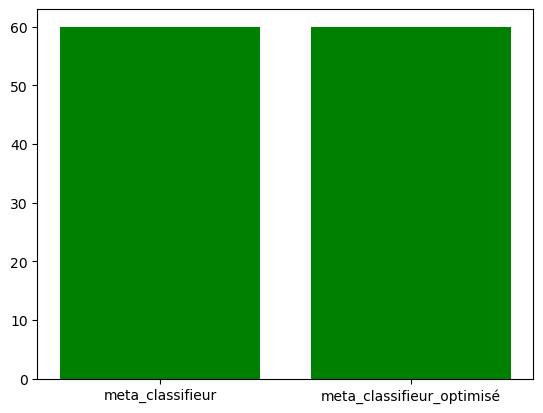

In [129]:
fig = plt.figure()

x = ['meta_classifieur','meta_classifieur_optimisé']
height = [accuracy,accuracy2]
plt.bar(x, height, color='green' )
plt.show()

### 3) Test de l'algorithme d'apprentissage

#### 3.a) Prédiction du dataset testing

Nous allons à présent tester l'algorithme sur le jeu de données testing (différents de la partie d'apprentissage)

In [130]:
#dezip
txt_features, labels = zip(*testing)

prediction = meta_model2.classify_many(txt_features)

### 4) Explication des résultats

#### 4.a) Matrice de confusion

##### Explanation of the results table
print("precision = How accurate the positive predictions are")
print("TP/(TP+FP)\n")

print("recall = Coverage of truly positive observations")
print("TP/(TP+FN)\n")

print("F1_score = Hybrid indicator used for non-balanced classes")
print("2TP/(2TP+FP+FN)\n")

# affichage des résultats
erreur= round((100-accuracy),3)
print("The error rate is: {}".format(error)+" %\n")
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['Actually', 'Actually'], ['disliked', 'Liked']],
    columns = [['Predicted', 'Predicted'], ['disliked', 'Liked']])

#### Courbe ROC

La courbe ROC représente le taux de True Positives en fonction de taux de False Positives et obtenue en faisant varier le seuil. 

cf: https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

tuto traçage de la courbe: https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

Ces indicateurs sont résumés dans le tableau suivant :


|        Indicatieur          |       Formule         |       Equivalent      |
|-----------------------------|-----------------------|-----------------------|
|   True Positive Rate TPR    |    $(TP)/(TP+FN)$     |   Recall, sensitivity |
|   False Positive Rate FPR   |    $(FP)/(TN+FP)$     |      1-specificity    |



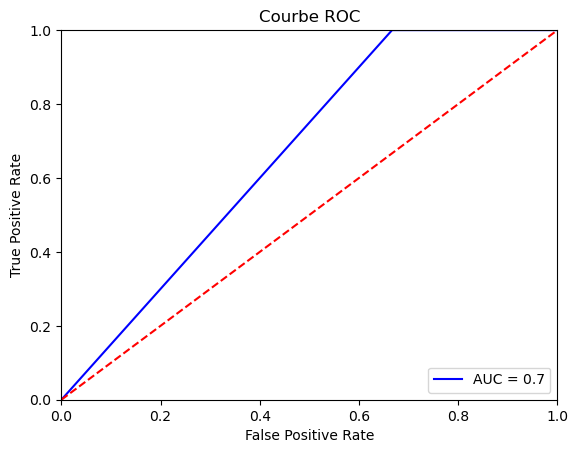

In [132]:
# Importation bibliothèques
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

labelsTAB = np.asarray(labels)

# Calculate FPR & TPR
false_positive_rate, true_positive_rate, thresholds = roc_curve(labelsTAB, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Display curbes
plt.title('Courbe ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.1f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## C. Conclusion

Ce classifieur présente des lacunes pour deux raisons :

* La matrice de confusion montre une mauvaise distribution des échantillons de test de formation (le programme a du mal à reconnaître les dislikes).
* La courbe ROC a une aire nulle, ce qui signifie que notre classifieur ne peut pas vraiment classer les descriptions (il ne se trompe pas tout le temps --> aire négative, il classe parfaitement --> aire positive).


Cela est principalement dû au fait que les likes et les dislikes de l'utilisateur sont générés aléatoirement, donc ne sont pas cohérents. Cependant, si nous faisons en sorte que notre utilisateur like beaucoup plus que dislike, notre classifieur aura de bien meilleures performances.